In [31]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             confusion_matrix, roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                              AdaBoostClassifier)
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense

In [32]:
data = pd.read_csv(r'D:\Projects\AIES\exe\datapipeline\scaled_breast_cancer_data.csv')

In [33]:
data.head()

,ID,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst
0,842302,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [34]:
X = data.drop(columns=["ID", "Diagnosis"])
y = data['Diagnosis']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector machine

In [36]:
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_grid_search = GridSearchCV(estimator=SVC(probability=True), param_grid=svm_param_grid, cv=5, n_jobs=-1)
svm_grid_search.fit(X_train, y_train)
best_svm_model = svm_grid_search.best_estimator_

# Neural Network
# - Feedforward Neural Network

In [48]:
def create_fnn():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # First hidden layer
    model.add(Dense(32, activation='relu'))                                   # Second hidden layer
    model.add(Dense(1, activation='sigmoid'))                                 # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model
    return model

# Create the FNN model
fnn_model = create_fnn()

# Fit the FNN model
fnn_model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

# Evaluate the FNN model
loss, accuracy = fnn_model.evaluate(X_test, y_test)
print(f'FNN Test Accuracy: {accuracy:.6f}')

Epoch 1/100


C:\Users\Nikita\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6470 - loss: 0.6340 - val_accuracy: 0.9451 - val_loss: 0.2537
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9675 - loss: 0.2047 - val_accuracy: 0.9560 - val_loss: 0.1506
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9660 - loss: 0.1406 - val_accuracy: 0.9670 - val_loss: 0.1180
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9784 - loss: 0.0742 - val_accuracy: 0.9560 - val_loss: 0.1047
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9916 - loss: 0.0518 - val_accuracy: 0.9560 - val_loss: 0.0968
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9788 - loss: 0.0757 - val_accuracy: 0.9560 - val_loss: 0.0967
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9856 - loss: 0.0558 - val_accuracy: 0.9780 - val_loss: 0.0909
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9826 - loss: 0.0552 - val_accuracy: 0.9780 - val_loss: 0.0

# XGBoost

In [46]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=xgb_param_grid, cv=5, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)
best_xgb_model = xgb_grid_search.best_estimator_

# Decision Tree

In [39]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)
best_dt_model = dt_grid_search.best_estimator_

In [40]:
ada_dt = AdaBoostClassifier(DecisionTreeClassifier(random_state=42), n_estimators=50, learning_rate=1.0, random_state=42)
ada_dt.fit(X_train, y_train)

C:\Users\Nikita\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                   random_state=42)

# Gradient Boosting Classifier

In [41]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

# Random Forest Classifier & Logistic Regression

In [42]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

# Evaluation

In [49]:
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    # Predict probabilities (if applicable) and class labels
    y_train_pred_proba = model.predict(X_train)
    y_test_pred_proba = model.predict(X_test)
    
    # Convert probabilities to binary predictions (0 or 1) using a threshold of 0.5
    y_train_pred = (y_train_pred_proba >= 0.5).astype(int)
    y_test_pred = (y_test_pred_proba >= 0.5).astype(int)
    
    # Calculate metrics
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_train = precision_score(y_train, y_train_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_train = recall_score(y_train, y_train_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)
    
    tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()
    tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()
    
    specificity_train = tn_train / (tn_train + fp_train)
    specificity_test = tn_test / (tn_test + fp_test)
    
    auc_train = roc_auc_score(y_train, y_train_pred_proba)
    auc_test = roc_auc_score(y_test, y_test_pred_proba)
    
    # Create a dictionary to hold the metrics
    metrics = {
        "Model": model_name,
        "Accuracy (Train)": accuracy_train,
        "Accuracy (Test)": accuracy_test,
        "Precision (Train)": precision_train,
        "Precision (Test)": precision_test,
        "Recall (Train)": recall_train,
        "Recall (Test)": recall_test,
        "F1-Score (Train)": f1_train,
        "F1-Score (Test)": f1_test,
        "Sensitivity (Train)": recall_train,
        "Sensitivity (Test)": recall_test,
        "Specificity (Train)": specificity_train,
        "Specificity (Test)": specificity_test,
        "AUC (Train)": auc_train,
        "AUC (Test)": auc_test
    }
    
    return metrics

# List to hold metrics for all models
results = []

# Evaluate all models
results.append(evaluate_model(fnn_model, "Feedforward Neural Network (FNN)", X_train, y_train, X_test, y_test))
results.append(evaluate_model(best_xgb_model, "XGBoost", X_train, y_train, X_test, y_test))
results.append(evaluate_model(best_svm_model, "Support Vector Machine (SVM)", X_train, y_train, X_test, y_test))
results.append(evaluate_model(ada_dt, "AdaBoost with Decision Tree", X_train, y_train, X_test, y_test))
results.append(evaluate_model(gbc, "Gradient Boosting Classifier", X_train, y_train, X_test, y_test))
results.append(evaluate_model(rf_model, "Random Forest", X_train, y_train, X_test, y_test))
results.append(evaluate_model(logistic_model, "Logistic Regression", X_train, y_train, X_test, y_test))

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Model,Accuracy (Train),Accuracy (Test),Precision (Train),Precision (Test),Recall (Train),Recall (Test),F1-Score (Train),F1-Score (Test),Sensitivity (Train),Sensitivity (Test),Specificity (Train),Specificity (Test),AUC (Train),AUC (Test)
0,Feedforward Neural Network (FNN),0.991209,0.982456,0.994012,1.000000,0.982249,0.953488,0.988095,0.976190,0.982249,0.953488,0.996503,1.000000,0.999710,0.991484
1,XGBoost,1.000000,0.973684,1.000000,0.976190,1.000000,0.953488,1.000000,0.964706,1.000000,0.953488,1.000000,0.985915,1.000000,0.969702
2,Support Vector Machine (SVM),0.982418,0.982456,0.987879,1.000000,0.964497,0.953488,0.976048,0.976190,0.964497,0.953488,0.993007,1.000000,0.978752,0.976744
3,AdaBoost with Decision Tree,1.000000,0.938596,1.000000,0.928571,1.000000,0.906977,1.000000,0.917647,1.000000,0.906977,1.000000,0.957746,1.000000,0.932362
4,Gradient Boosting Classifier,1.000000,0.956140,1.000000,0.952381,1.000000,0.930233,1.000000,0.941176,1.000000,0.930233,1.000000,0.971831,1.000000,0.951032
5,Random Forest,1.000000,0.964912,1.000000,0.975610,1.000000,0.930233,1.000000,0.952381,1.000000,0.930233,1.000000,0.985915,1.000000,0.958074
6,Logistic Regression,0.986813,0.973684,0.988024,0.976190,0.976331,0.953488,0.982143,0.964706,0.976331,0.953488,0.993007,0.985915,0.984669,0.969702


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


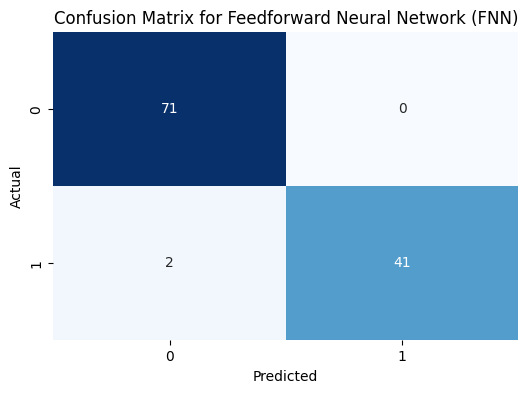

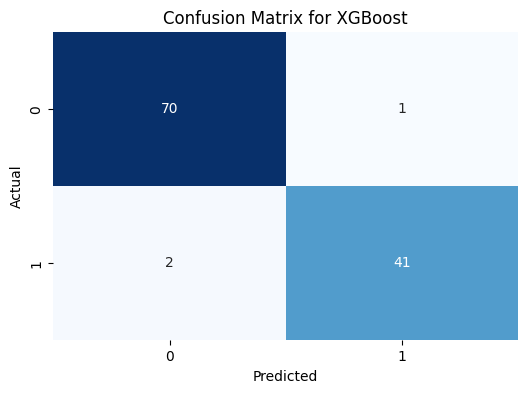

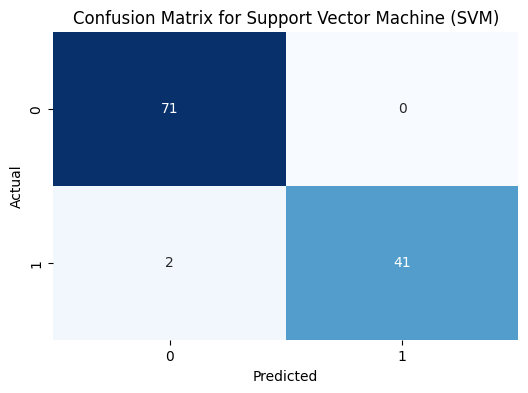

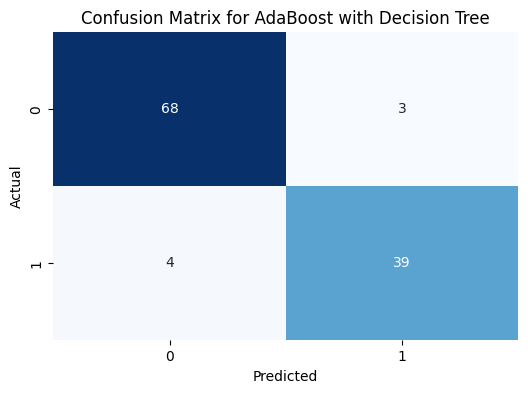

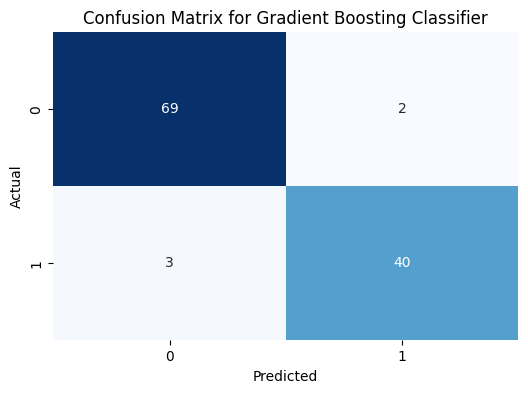

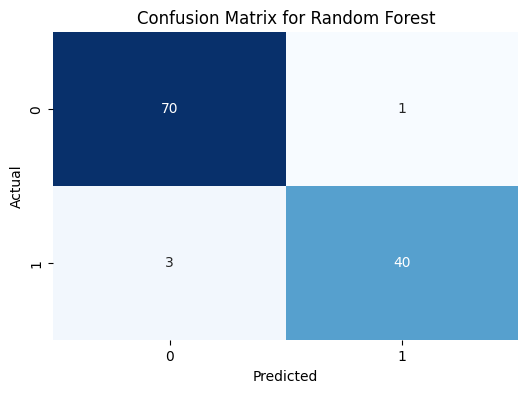

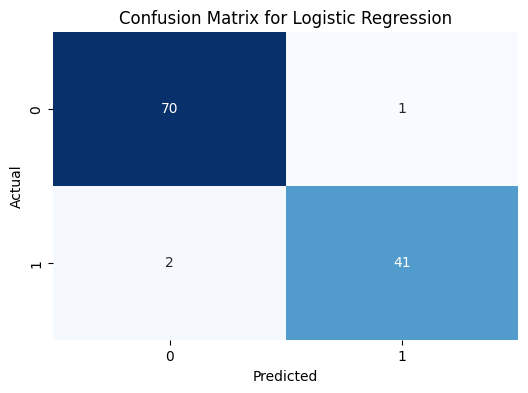

,Model,Accuracy (Train),Accuracy (Test),Precision (Train),Precision (Test),Recall (Train),Recall (Test),F1-Score (Train),F1-Score (Test),Sensitivity (Train),Sensitivity (Test),Specificity (Train),Specificity (Test),AUC (Train),AUC (Test)
0,Feedforward Neural Network (FNN),0.991209,0.982456,0.994012,1.000000,0.982249,0.953488,0.988095,0.976190,0.982249,0.953488,0.996503,1.000000,0.999710,0.991484
1,XGBoost,1.000000,0.973684,1.000000,0.976190,1.000000,0.953488,1.000000,0.964706,1.000000,0.953488,1.000000,0.985915,1.000000,0.969702
2,Support Vector Machine (SVM),0.982418,0.982456,0.987879,1.000000,0.964497,0.953488,0.976048,0.976190,0.964497,0.953488,0.993007,1.000000,0.978752,0.976744
3,AdaBoost with Decision Tree,1.000000,0.938596,1.000000,0.928571,1.000000,0.906977,1.000000,0.917647,1.000000,0.906977,1.000000,0.957746,1.000000,0.932362
4,Gradient Boosting Classifier,1.000000,0.956140,1.000000,0.952381,1.000000,0.930233,1.000000,0.941176,1.000000,0.930233,1.000000,0.971831,1.000000,0.951032
5,Random Forest,1.000000,0.964912,1.000000,0.975610,1.000000,0.930233,1.000000,0.952381,1.000000,0.930233,1.000000,0.985915,1.000000,0.958074
6,Logistic Regression,0.986813,0.973684,0.988024,0.976190,0.976331,0.953488,0.982143,0.964706,0.976331,0.953488,0.993007,0.985915,0.984669,0.969702


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, model_name, X_test, y_test):
    # Predict the binary labels for the test set
    y_test_pred_proba = model.predict(X_test)
    y_test_pred = (y_test_pred_proba >= 0.5).astype(int)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Example usage: Plot confusion matrices for all models
plot_confusion_matrix(fnn_model, "Feedforward Neural Network (FNN)", X_test, y_test)
plot_confusion_matrix(best_xgb_model, "XGBoost", X_test, y_test)
plot_confusion_matrix(best_svm_model, "Support Vector Machine (SVM)", X_test, y_test)
plot_confusion_matrix(ada_dt, "AdaBoost with Decision Tree", X_test, y_test)
plot_confusion_matrix(gbc, "Gradient Boosting Classifier", X_test, y_test)
plot_confusion_matrix(rf_model, "Random Forest", X_test, y_test)
plot_confusion_matrix(logistic_model, "Logistic Regression", X_test, y_test)

# Display the metrics table
display(results_df)

In [51]:
pred_fnn = fnn_model.predict(X_test)
pred_fnn_class = (pred_fnn > 0.5).astype(int)

pred_svm = best_svm_model.predict(X_test)

# Print the predictions
print("FNN Predicted Classes on Test Data:", pred_fnn_class)
print("SVM Predicted Classes on Test Data:", pred_svm)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
FNN Predicted Classes on Test Data: [[0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]]
SVM Predicted Classes on Test Data: [0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]


In [53]:
from sklearn.metrics import classification_report

accuracy_fnn = accuracy_score(y_test, pred_fnn_class)
print("FNN Accuracy:", accuracy_fnn)

# Print classification report for FNN
print("\nFNN Classification Report:\n", classification_report(y_test, pred_fnn_class))

# Evaluate SVM Predictions
accuracy_svm = accuracy_score(y_test, pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Print classification report for SVM
print("\nSVM Classification Report:\n", classification_report(y_test, pred_svm))

# Confusion Matrix
confusion_fnn = confusion_matrix(y_test, pred_fnn_class)
confusion_svm = confusion_matrix(y_test, pred_svm)

print("\nFNN Confusion Matrix:\n", confusion_fnn)
print("\nSVM Confusion Matrix:\n", confusion_svm)

FNN Accuracy: 0.9824561403508771

FNN Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

SVM Accuracy: 0.9824561403508771

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


FNN Confusion Matrix:
 [[71  0]
 [ 2 41]]

SVM Confusion Matrix:
 [[71  0]
 [ 2 41]]
